In [145]:
# Check that PYSPARK and SC exist
print(pyspark)
print(sc)

<module 'pyspark' from '/root/spark/python/pyspark/__init__.pyc'>


In [146]:
# Download helper functions from GitHub
import urllib


spark_helper_functions_url =\
    'https://raw.githubusercontent.com/legoml/MachinePlayground/master/MachinePlayground/Functions/FUNCTIONS___zzz_spark.py'
spark_helper_function_file_name = 'spark_helper_functions.py'
urllib.urlretrieve(spark_helper_functions_url, spark_helper_function_file_name)
import spark_helper_functions as shf
shf.pyspark = pyspark
shf.sc = sc

In [140]:
# Cell to reload Spark Helper Functions file
def reload_shf_file():
    global spark_helper_functions_url, spark_helper_function_file_name, shf
    urllib.urlretrieve(spark_helper_functions_url, spark_helper_function_file_name)    
    reload(shf)
    

reload_shf_file()

In [141]:
# Cell to reload Spark Helper Functions module
reload(shf)

<module 'spark_helper_functions' from 'spark_helper_functions.pyc'>

In [142]:
# Download Digits dataset

import base64
import json
import numpy


def parse(x):
    digit = json.loads(x)
    array = numpy.fromstring(base64.b64decode(digit["data"]), dtype=numpy.ubyte)
    array = array.astype(float)
    return (digit["label"], array)


digits = sc.textFile("s3n://stat-37601/digits.base64.json").map(parse)
digits.cache()

PythonRDD[34] at RDD at PythonRDD.scala:42

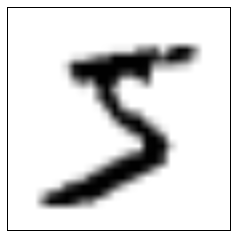

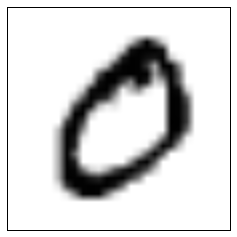

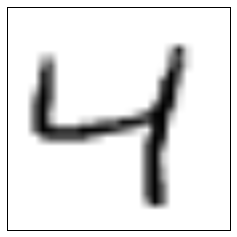

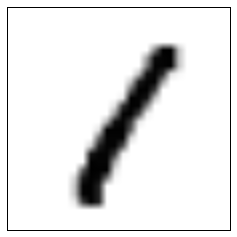

In [143]:
# Plot first 4 figures

%matplotlib inline
import matplotlib.pyplot as plt
images = digits.take(4)
for i in range(4):
    image = images[i][1]
    image = image.astype(float)/256
    plt.figure(i)
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [144]:
# Count the number of digits in each
type(digits.countByKey())

collections.defaultdict

In [104]:
# Normalize each digit's 

<module 'pyspark' from '/root/spark/python/pyspark/__init__.pyc'>

In [119]:
reload_shf_file()
a = [1, 2, 3]
s = shf.rdd_mean(a)
s

2

In [135]:
help(pyspark.rdd.RDD.groupWith)

Help on method groupWith in module pyspark.rdd:

groupWith(self, other, *others) unbound pyspark.rdd.RDD method
    Alias for cogroup but with support for multiple RDDs.
    
    >>> w = sc.parallelize([("a", 5), ("b", 6)])
    >>> x = sc.parallelize([("a", 1), ("b", 4)])
    >>> y = sc.parallelize([("a", 2)])
    >>> z = sc.parallelize([("b", 42)])
    >>> map((lambda (x,y): (x, (list(y[0]), list(y[1]), list(y[2]), list(y[3])))),                 sorted(list(w.groupWith(x, y, z).collect())))
    [('a', ([5], [1], [2], [])), ('b', ([6], [4], [], [42]))]

